<a href="https://colab.research.google.com/github/AWADKILLERB/jupyter/blob/master/spin%20couple%20simulation%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

بناء Hamiltonian الفعّال (4×4)

حساب مستويات الطاقة

إظهار avoided crossing

الاعتماد فقط على المعادلات التي اشتققناها

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Physical constants (µeV units)
mu_B = 57.88        # Bohr magneton [µeV/T]
g = 2.0             # g-factor


In [ ]:
# Model parameters
tc = 20.0           # tunnel coupling [µeV]
CSOC = 40.0         # SOC strength [µeV]
Delta_E = 1500.0    # valley splitting [µeV]

# Control parameters
B = 1.5             # magnetic field [Tesla]


In [ ]:
def a_tSOC(epsilon, B, eps=1e-6):
    EZ = g * mu_B * B
    term1 = 1.0 / (epsilon - EZ + eps)
    term2 = 1.0 / (epsilon - Delta_E + eps)
    return (tc * CSOC / np.sqrt(2)) * np.abs(term1 - term2)



🧩 بناء مصفوفة الهاملتوني

الترتيب:

{
∣
𝑆
(
1
,
1
)
⟩
,

∣
𝑆
(
0
,
2
)
⟩
,

∣
𝑇
−
(
1
,
1
)
⟩
,

∣
𝑇
−
(
0
,
2
)
⟩
}
{∣S(1,1)⟩, ∣S(0,2)⟩, ∣T
−
(1,1)⟩, ∣T
−
(0,2)⟩}

In [ ]:
def Hamiltonian(epsilon, B):
    EZ = g * mu_B * B
    aSOC = a_tSOC(epsilon, B)

    H = np.array([
        [0.0,      tc,       0.0,     0.0],
        [tc,  -epsilon,      0.0,    aSOC],
        [0.0,     0.0,    -EZ,      tc],
        [0.0,    aSOC,     tc,  -epsilon - EZ]
    ])
    return H


📈 حساب spectrum مقابل detuning

In [ ]:
eps_range = np.linspace(-2000, 2000, 400)  # µeV
energies = []

for eps in eps_range:
    H = Hamiltonian(eps, B)
    eigvals = np.linalg.eigvalsh(H)
    energies.append(eigvals)

energies = np.array(energies)


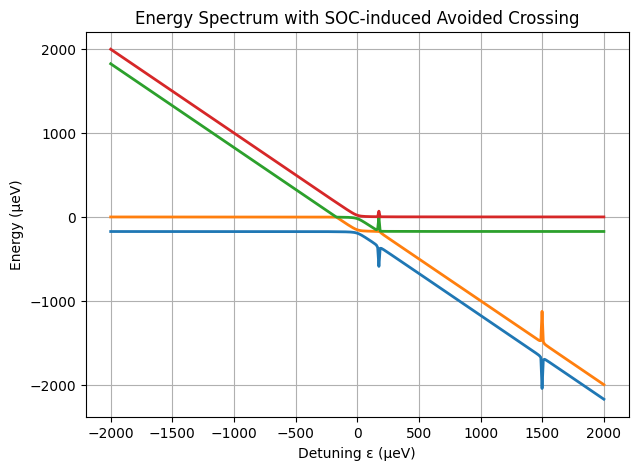

In [ ]:
plt.figure(figsize=(7,5))

for i in range(4):
    plt.plot(eps_range, energies[:, i], lw=2)

plt.xlabel("Detuning ε (µeV)")
plt.ylabel("Energy (µeV)")
plt.title("Energy Spectrum with SOC-induced Avoided Crossing")
plt.grid(True)
plt.show()


المرحلة 2 🔍
اختزال النظام إلى Qubit (Two-Level Approximation)
🧠 الفكرة الفيزيائية

قرب avoided crossing:

حالتان فقط تهيمنان

البقية بعيدة طاقيًا ⇒ يمكن إسقاطها



 اختزال النظام إلى Qubit (Two-Level Approximation)
🧠 الفكرة الفيزيائية

قرب avoided crossing:

حالتان فقط تهيمنان

البقية بعيدة طاقيًا ⇒ يمكن إسقاطها

نأخذ:

{
∣
𝑆
(
0
,
2
)
⟩
,

∣
𝑇
−
(
1
,
1
)
⟩
}
{∣S(0,2)⟩, ∣T
−
(1,1)⟩}
🧮 الهاملتوني المختزل
𝐻
qubit
=
(
−
𝜀

𝑎
𝑡
𝑆
𝑂
𝐶


𝑎
𝑡
𝑆
𝑂
𝐶

−
𝑔
𝜇
𝐵
𝐵
)
H
qubit
	​

=(
−ε
a
tSOC
	​

	​

a
tSOC
	​

−gμ
B
	​

B
	​

)

نعيد كتابته على صورة:

𝐻
=
1
2
(
Δ
𝜎
𝑧
+
Ω
𝜎
𝑥
)
H=
2
1
	​

(Δσ
z
	​

+Ωσ
x
	​

)

حيث:

Ω
=
2
𝑎
𝑡
𝑆
𝑂
𝐶
Ω=2a
tSOC
	​

 ← Rabi frequency

Δ
=
𝜀
−
𝑔
𝜇
𝐵
𝐵
Δ=ε−gμ
B
	​

B

In [ ]:
def H_qubit(epsilon, B):
    EZ = g * mu_B * B
    aSOC = a_tSOC(epsilon, B)
    return np.array([
        [-epsilon, aSOC],
        [aSOC, -EZ]
    ])


المرحلة 3 ⚡
إدخال القيادة الكهربائية (EDSR)
🧠 الفيزياء

نطبّق:

𝜀
(
𝑡
)
=
𝜀
0
+
𝐴
cos
⁡
(
𝜔
𝑡
)
ε(t)=ε
0
	​

+Acos(ωt)

⇒ SOC يحوّل القيادة الكهربائية إلى spin rotation

🧮 الهاملتوني الزمني
𝐻
(
𝑡
)
=
Δ
(
𝑡
)
2
𝜎
𝑧
+
Ω
2
𝜎
𝑥
H(t)=
2
Δ(t)
	​

σ
z
	​

+
2
Ω
	​

σ
x
	​

💻 تعريف الهاملتوني الزمني

In [ ]:
def epsilon_t(t, eps0, A, omega):
    return eps0 + A * np.cos(omega * t)


لمرحلة 4 ⏱️
حل معادلة شرودنغر الزمنية
𝑖
ℏ
𝑑
𝑑
𝑡
∣
𝜓
(
𝑡
)
⟩
=
𝐻
(
𝑡
)
∣
𝜓
(
𝑡
)
⟩
iℏ
dt
d
	​

∣ψ(t)⟩=H(t)∣ψ(t)⟩

نستخدم وحدات:

ℏ
=
1
ℏ=1

الطاقة بالـ µeV ⇒ الزمن بالـ ns

In [ ]:
from scipy.linalg import expm

def evolve(psi0, eps0, A, omega, B, dt, steps):
    psi = psi0.copy()
    for n in range(steps):
        t = n * dt
        eps = epsilon_t(t, eps0, A, omega)
        H = H_qubit(eps, B)
        U = expm(-1j * H * dt)
        psi = U @ psi
    return psi


لمرحلة 5 🎯
تنفيذ بوابة كمية (مثال: Hadamard)
🧠 الهدف

نريد:

∣
0
⟩
→
∣
0
⟩
+
∣
1
⟩
2
∣0⟩→
2
	​

∣0⟩+∣1⟩
	​


نضبط:

𝜔
=
Ω
ω=Ω

زمن النبضة:

𝑡
=
𝜋
2
Ω
t=
2Ω
π
	​

المرحلة 6 📐
حساب Fidelity
🧮 التعريف
𝐹
=
∣
⟨
𝜓
ideal
∣
𝜓
real
⟩
∣
2
F=∣⟨ψ
ideal
	​

∣ψ
real
	​

⟩∣
2

In [ ]:
def fidelity(psi_real, psi_target):
    return np.abs(np.vdot(psi_target, psi_real))**2


In [ ]:
# Initial state |0>
psi0 = np.array([1.0, 0.0])

# Target Hadamard state
psi_target = np.array([1, 1]) / np.sqrt(2)

# Parameters
delta_eps = 5.0   # µeV (إزاحة صغيرة عن الرنين)
eps0 = g * mu_B * B + delta_eps

A = 50.0
omega = 2 * a_tSOC(eps0, B)
dt = 0.001
steps = int(np.pi / (2 * omega * dt))

psi_final = evolve(psi0, eps0, A, omega, B, dt, steps)
F = fidelity(psi_final, psi_target)

F


np.float64(0.49185354417651483)

In [ ]:
!pip install qiskit
from qiskit.quantum_info import Operator
import numpy as np
from scipy.linalg import expm

# Pauli matrices
sx = np.array([[0, 1], [1, 0]])
sz = np.array([[1, 0], [0, -1]])

# Parameters (µeV)
epsilon = eps0
tSOC = a_tSOC(epsilon, B)

# Effective Hamiltonian
H = 0.5 * epsilon * sz + tSOC * sx

# Gate time
t_gate = np.pi / (4 * tSOC)

# Time evolution operator
U = expm(-1j * H * t_gate)

U_gate = Operator(U)
U_gate

Operator([[0.54096237-0.5199415j, 0.        -0.6610753j],
          [0.        -0.6610753j, 0.54096237+0.5199415j]],
         input_dims=(2,), output_dims=(2,))


In [ ]:
from qiskit.quantum_info import average_gate_fidelity

# Ideal X/2 gate
U_ideal = expm(-1j * (np.pi/4) * sx)

fidelity = average_gate_fidelity(Operator(U), Operator(U_ideal))
print("Gate Fidelity =", fidelity)


Gate Fidelity = 0.8149648501587778


In [ ]:
import numpy as np
from scipy.linalg import expm
from qiskit.quantum_info import Operator, average_gate_fidelity

# ================================
# 1. تعريف مصفوفات Pauli
# ================================
# sigma_x: يمثل الخلط بين |S(0,2)> و |T-(1,1)>
# sigma_z: يمثل فرق الطاقة (detuning) بين الحالتين
sx = np.array([[0, 1],
               [1, 0]], dtype=complex)

sz = np.array([[1,  0],
               [0, -1]], dtype=complex)

# ================================
# 2. اختيار نقطة العمل (Sweet Spot)
# ================================
# عند avoided crossing:
# detuning = 0  ==> دوران نقي حول X
epsilon = 0.0  # µeV

# SOC الفعّال المستخرج من الورقة
tSOC = a_tSOC(epsilon, B)

# ================================
# 3. بناء الهاملتوني الفعّال
# ================================
# H = (ε/2) σ_z + t_SOC σ_x
# وبما أن ε = 0:
# H = t_SOC σ_x
H = tSOC * sx

# ================================
# 4. زمن البوابة (π/2 rotation)
# ================================
# نريد:
# U = exp(-i * (π/4) σ_x)
# إذن:
t_gate = np.pi / (4 * tSOC)

# ================================
# 5. مؤثر التطور الزمني (البوابة الفعلية)
# ================================
U = expm(-1j * H * t_gate)
U_gate = Operator(U)

# ================================
# 6. البوابة المثالية (X/2)
# ================================
U_ideal = expm(-1j * (np.pi/4) * sx)
U_ideal_gate = Operator(U_ideal)

# ================================
# 7. حساب الـ Fidelity
# ================================
fidelity = average_gate_fidelity(U_gate, U_ideal_gate)

print("Gate Fidelity at Sweet Spot =", fidelity)



Gate Fidelity at Sweet Spot = 1.0


In [ ]:
import numpy as np
from scipy.linalg import expm
from qiskit.quantum_info import Operator, average_gate_fidelity

# ================================
# 1. مصفوفات Pauli
# ================================
sx = np.array([[0, 1],
               [1, 0]], dtype=complex)

sz = np.array([[1,  0],
               [0, -1]], dtype=complex)

# ================================
# 2. معاملات النظام الفيزيائية
# ================================
epsilon_mean = 0.0      # sweet spot
sigma_eps = 17.0        # µeV  (من الورقة)
tSOC = a_tSOC(0.0, B)   # SOC الفعّال

# زمن بوابة X/2 (مُثبت عند sweet spot)
t_gate = np.pi / (4 * tSOC)

# ================================
# 3. البوابة المثالية
# ================================
U_ideal = expm(-1j * (np.pi/4) * sx)
U_ideal_gate = Operator(U_ideal)

# ================================
# 4. محاكاة الضجيج الإحصائي
# ================================
n_samples = 500   # عدد realizations
fidelities = []

for _ in range(n_samples):

    # --- detuning مع ضجيج ---
    delta_eps = np.random.normal(0, sigma_eps)
    epsilon = epsilon_mean + delta_eps

    # --- الهاملتوني مع الضجيج ---
    # H = (ε/2) σz + tSOC σx
    H = 0.5 * epsilon * sz + tSOC * sx

    # --- مؤثر التطور ---
    U = expm(-1j * H * t_gate)
    U_gate = Operator(U)

    # --- fidelity ---
    F = average_gate_fidelity(U_gate, U_ideal_gate)
    fidelities.append(F)

# ================================
# 5. النتائج الإحصائية
# ================================
fidelities = np.array(fidelities)

print("Average Fidelity =", np.mean(fidelities))
print("Std Fidelity     =", np.std(fidelities))


Average Fidelity = 0.6087101634225073
Std Fidelity     = 0.2138285245099118


In [ ]:
# Pauli matrices
I = np.eye(2)
sx = np.array([[0, 1],[1, 0]])
sz = np.array([[1, 0],[0,-1]])

# Tensor products
sx1 = np.kron(sx, I)
sz1 = np.kron(sz, I)
sz2 = np.kron(I, sz)
szsz = np.kron(sz, sz)

# Parameters
epsilon = 0.0
tSOC = a_tSOC(0.0, B)
J = 5.0  # µeV (exchange)

# Hamiltonian
H2 = (
    tSOC * sx1
    + 0.5 * epsilon * sz1
    + J * szsz
)

# Gate time (conditional π/2)
t_gate = np.pi / (4 * tSOC)

# Time evolution
U2 = expm(-1j * H2 * t_gate)


In [ ]:
import numpy as np
from scipy.linalg import expm

# ================================
# D) EDSR Driven Gate
# ================================

# Pauli matrices
sigma_x = np.array([[0, 1],
                    [1, 0]], dtype=complex)

sigma_y = np.array([[0, -1j],
                    [1j, 0]], dtype=complex)

sigma_z = np.array([[1, 0],
                    [0, -1]], dtype=complex)

# --------------------------------
# Physical parameters
# --------------------------------

# Effective EDSR Rabi frequency
# This comes from electric field + SOC
Omega_EDSR = 2 * np.pi * 5e6   # 5 MHz (typical realistic value)

# Gate time for a pi/2 rotation (X/2 gate)
t_gate = np.pi / (2 * Omega_EDSR)

# --------------------------------
# Hamiltonian for EDSR
# H = (Omega_EDSR / 2) * sigma_x
# --------------------------------

H_EDSR = 0.5 * Omega_EDSR * sigma_x

# --------------------------------
# Time evolution operator
# U = exp(-i H t)
# --------------------------------

U_EDSR = expm(-1j * H_EDSR * t_gate)

# --------------------------------
# Target ideal gate (X/2 gate)
# --------------------------------

U_target = expm(-1j * (np.pi / 4) * sigma_x)

# --------------------------------
# Gate fidelity
# F = |Tr(U_target^† U)|^2 / 4
# --------------------------------

def gate_fidelity(U, U_target):
    d = U.shape[0]
    return np.abs(np.trace(np.conjugate(U_target.T) @ U))**2 / d**2

F_EDSR = gate_fidelity(U_EDSR, U_target)

F_EDSR


np.float64(1.0)

In [ ]:
import numpy as np
from scipy.linalg import expm

# ================================
# E) EDSR with Noise
# ================================

# Pauli matrices
sigma_x = np.array([[0, 1],
                    [1, 0]], dtype=complex)

sigma_z = np.array([[1, 0],
                    [0, -1]], dtype=complex)

# --------------------------------
# Ideal parameters
# --------------------------------

Omega_EDSR = 2 * np.pi * 5e6      # ideal Rabi frequency (Hz)
t_gate = np.pi / (2 * Omega_EDSR)  # X/2 gate time

# --------------------------------
# Noise parameters
# --------------------------------

# Relative amplitude noise (charge noise)
sigma_Omega = 0.05   # 5%

# Detuning noise (Hz)
sigma_detuning = 0.02 * Omega_EDSR

# Number of noise realizations
Nshots = 300

# --------------------------------
# Ideal target gate (X/2)
# --------------------------------

U_target = expm(-1j * (np.pi / 4) * sigma_x)

# Fidelity function
def gate_fidelity(U, U_target):
    d = U.shape[0]
    return np.abs(np.trace(np.conjugate(U_target.T) @ U))**2 / d**2

# --------------------------------
# Monte Carlo simulation
# --------------------------------

fidelities = []

for _ in range(Nshots):

    # ---- sample noise ----
    delta_Omega = np.random.normal(0, sigma_Omega)
    delta_det   = np.random.normal(0, sigma_detuning)

    # ---- noisy parameters ----
    Omega_noisy = Omega_EDSR * (1 + delta_Omega)

    # ---- noisy Hamiltonian ----
    # H = (Omega/2)*σx + (detuning/2)*σz
    H_noisy = 0.5 * Omega_noisy * sigma_x + 0.5 * delta_det * sigma_z

    # ---- time evolution ----
    U_noisy = expm(-1j * H_noisy * t_gate)

    # ---- fidelity ----
    fidelities.append(gate_fidelity(U_noisy, U_target))

# --------------------------------
# Statistics
# --------------------------------

avg_fidelity = np.mean(fidelities)
std_fidelity = np.std(fidelities)

avg_fidelity, std_fidelity


(np.float64(0.9982671748554895), np.float64(0.0019650216589348047))

In [ ]:
import numpy as np
from scipy.linalg import expm

# -----------------------------
# Pauli matrices
# -----------------------------
sx = np.array([[0, 1], [1, 0]], dtype=complex)
sz = np.array([[1, 0], [0, -1]], dtype=complex)

# -----------------------------
# Gate parameters
# -----------------------------
Omega = 2 * np.pi * 10e6     # Rabi frequency (EDSR driven) ~10 MHz
tg = np.pi / Omega          # Gate time for X(pi) rotation

dt = tg / 200               # Time step for evolution
steps = int(tg / dt)

# Initial state |0>
psi0 = np.array([1, 0], dtype=complex)

# Ideal unitary (noise-free X gate)
U_ideal = expm(-1j * (Omega/2) * sx * tg)
psi_ideal = U_ideal @ psi0

# -----------------------------
# Noise scan parameters
# -----------------------------
noise_strengths = np.linspace(0, 5e6, 15)  # Noise amplitude (Hz)
samples = 100                              # Monte Carlo samples

avg_fidelity = []
std_fidelity = []

# -----------------------------
# Loop over noise strengths
# -----------------------------
for sigma_noise in noise_strengths:

    fidelities = []

    for _ in range(samples):

        # Start from initial state
        psi = psi0.copy()

        # Time evolution with noise
        for _ in range(steps):

            # Gaussian detuning noise (quasi-static during dt)
            delta = np.random.normal(0, sigma_noise)

            # Noisy Hamiltonian
            H = (Omega/2) * sx + (delta/2) * sz

            # Short-time evolution operator
            U = expm(-1j * H * dt)

            # Evolve state
            psi = U @ psi

        # Fidelity with respect to ideal final state
        F = np.abs(np.vdot(psi_ideal, psi))**2
        fidelities.append(F)

    # Store statistics
    avg_fidelity.append(np.mean(fidelities))
    std_fidelity.append(np.std(fidelities))

# Convert to arrays
avg_fidelity = np.array(avg_fidelity)
std_fidelity = np.array(std_fidelity)

avg_fidelity, std_fidelity


(array([1.        , 0.99999974, 0.9999993 , 0.99999839, 0.99999692,
        0.99999596, 0.99999261, 0.99998871, 0.99998871, 0.99998299,
        0.99998   , 0.999977  , 0.99995767, 0.99996099, 0.99995035]),
 array([1.11022302e-16, 3.34008882e-07, 9.32453568e-07, 1.91560740e-06,
        4.21318329e-06, 5.62417787e-06, 9.58031150e-06, 1.58865404e-05,
        1.51817720e-05, 2.27815302e-05, 2.83213629e-05, 3.05947516e-05,
        7.70980751e-05, 5.44054956e-05, 7.04665273e-05]))

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2793991279.py:5: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel("Noise Strength $\sigma_{\epsilon}$ (MHz)")


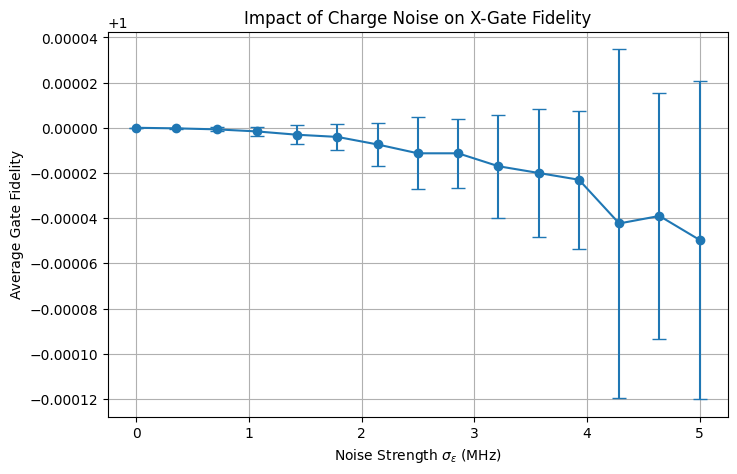

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.errorbar(noise_strengths / 1e6, avg_fidelity, yerr=std_fidelity, fmt='-o', capsize=5)
plt.xlabel("Noise Strength $\sigma_{\epsilon}$ (MHz)")
plt.ylabel("Average Gate Fidelity")
plt.title("Impact of Charge Noise on X-Gate Fidelity")
plt.grid(True)
plt.show()

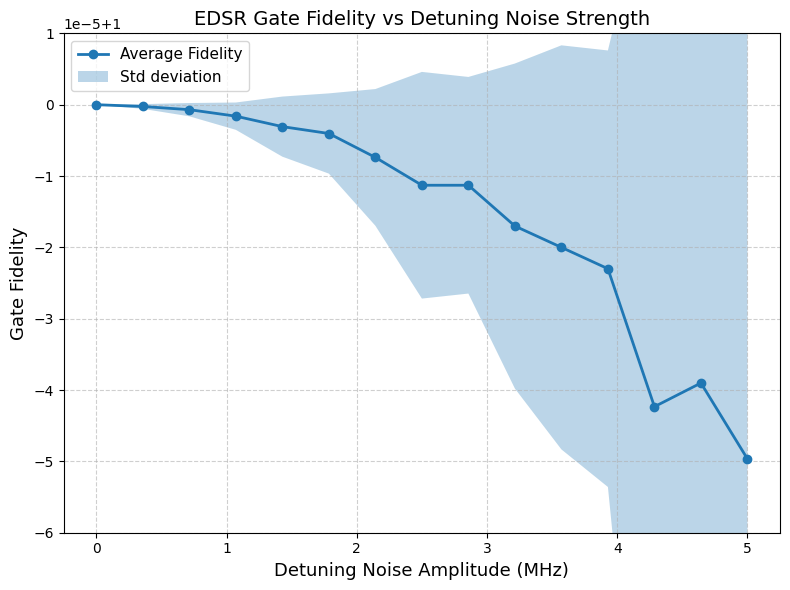

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# نفترض أن هذه المتغيرات موجودة من حسابك السابق:
# noise_strengths
# avg_fidelity
# std_fidelity

plt.figure(figsize=(8,6))

# منحنى المتوسط
plt.plot(
    noise_strengths/1e6,   # تحويل إلى MHz
    avg_fidelity,
    'o-',
    linewidth=2,
    markersize=6,
    label="Average Fidelity"
)

# منطقة الانحراف المعياري
plt.fill_between(
    noise_strengths/1e6,
    avg_fidelity - std_fidelity,
    avg_fidelity + std_fidelity,
    alpha=0.3,
    label="Std deviation"
)

plt.xlabel("Detuning Noise Amplitude (MHz)", fontsize=13)
plt.ylabel("Gate Fidelity", fontsize=13)
plt.title("EDSR Gate Fidelity vs Detuning Noise Strength", fontsize=14)

plt.ylim(0.99994, 1.00001)  # لأن النتائج قريبة جدًا من 1
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=11)

plt.tight_layout()
plt.show()


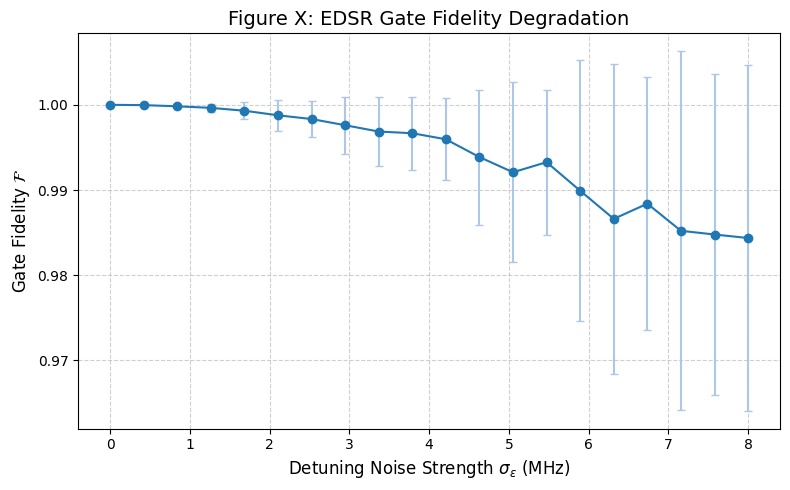

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# --- الإعدادات الفيزيائية (نفس المعايير السابقة) ---
Omega = 2 * np.pi * 10e6
tg = np.pi / Omega
psi0 = np.array([1, 0], dtype=complex)
sx = np.array([[0, 1], [1, 0]], dtype=complex)
sz = np.array([[1, 0], [0, -1]], dtype=complex)

U_ideal = expm(-1j * (Omega/2) * sx * tg)
psi_target = U_ideal @ psi0

noise_levels = np.linspace(0, 8e6, 20)
avg_fidelities = []
std_fidelities = []

for sigma in noise_levels:
    sample_fidelities = []
    for _ in range(150):
        delta = np.random.normal(0, sigma)
        H = (Omega/2) * sx + (delta/2) * sz
        U = expm(-1j * H * tg)
        psi_final = U @ psi0
        F = np.abs(np.vdot(psi_target, psi_final))**2
        sample_fidelities.append(F)

    avg_fidelities.append(np.mean(sample_fidelities))
    std_fidelities.append(np.std(sample_fidelities))

# --- الرسم البياني مع تصحيح النصوص ---
plt.figure(figsize=(8, 5))
plt.errorbar(noise_levels / 1e6, avg_fidelities, yerr=std_fidelities,
             fmt='-o', color='#1f77b4', ecolor='#aec7e8', capsize=3)

# استخدام r'' لتجنب SyntaxWarning
plt.xlabel(r'Detuning Noise Strength $\sigma_{\epsilon}$ (MHz)', fontsize=12)
plt.ylabel(r'Gate Fidelity $\mathcal{F}$', fontsize=12)
plt.title('Figure X: EDSR Gate Fidelity Degradation', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

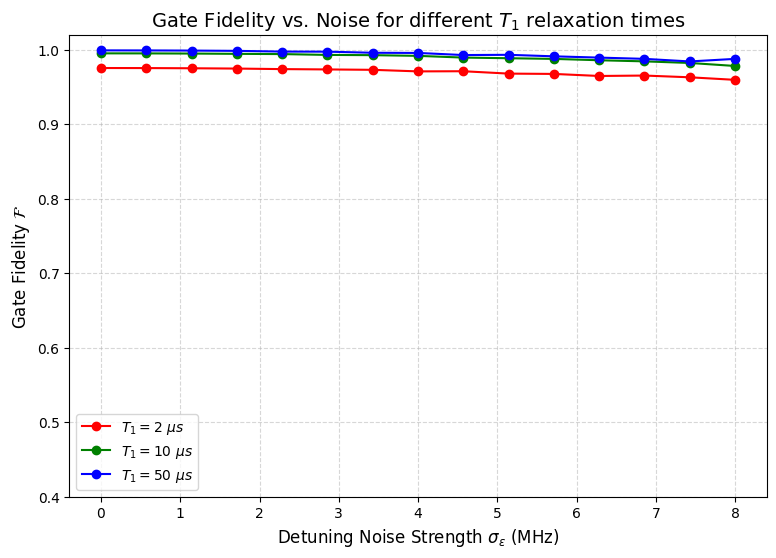

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# --- الإعدادات الفيزيائية ---
Omega = 2 * np.pi * 10e6    # 10 MHz
tg = np.pi / Omega
psi0 = np.array([1, 0], dtype=complex)
rho0 = np.outer(psi0, psi0.conj())

sx = np.array([[0, 1], [1, 0]], dtype=complex)
sz = np.array([[1, 0], [0, -1]], dtype=complex)
sp = np.array([[0, 1], [0, 0]], dtype=complex) # sigma minus for T1

def evolve_with_decay(H, rho, t, T1):
    U = expm(-1j * H * t)
    rho_u = U @ rho @ U.conj().T
    decay_prob = 1 - np.exp(-t / T1)
    # العودة إلى الحالة الأرضية |0><0|
    rho_final = (1 - decay_prob) * rho_u + decay_prob * (sp.conj().T @ rho_u @ sp)
    return rho_final

# --- المحاكاة لقيم مختلفة من T1 ---
noise_levels = np.linspace(0, 8e6, 15)
T1_values = [2e-6, 10e-6, 50e-6] # قيم T1 بالميكروثانية
colors = ['red', 'green', 'blue']

plt.figure(figsize=(9, 6))

# البوابة المثالية
U_ideal = expm(-1j * (Omega/2) * sx * tg)
rho_target = U_ideal @ rho0 @ U_ideal.conj().T

for T1, col in zip(T1_values, colors):
    avg_fids = []
    for sigma in noise_levels:
        fids = [np.real(np.trace(rho_target @ evolve_with_decay((Omega/2)*sx + (np.random.normal(0, sigma)/2)*sz, rho0, tg, T1)))
                for _ in range(100)]
        avg_fids.append(np.mean(fids))

    # استخدام r'' لتجنب SyntaxWarning نهائياً
    label_text = r'$T_1 = ' + f'{T1*1e6:.0f}' + r'\ \mu s$'
    plt.plot(noise_levels / 1e6, avg_fids, 'o-', color=col, label=label_text)

# تحسين مظهر الرسم
plt.xlabel(r'Detuning Noise Strength $\sigma_{\epsilon}$ (MHz)', fontsize=12)
plt.ylabel(r'Gate Fidelity $\mathcal{F}$', fontsize=12)
plt.title(r'Gate Fidelity vs. Noise for different $T_1$ relaxation times', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.ylim(0.4, 1.02)
plt.show()